#Kmean Clusters with Elbow Method and Silhoutte Method

#Basic Analysis of the data

In [66]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
%matplotlib inline

In [67]:
#Loading the data
data = datasets.load_iris()

In [68]:
#View the data
data

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [69]:
#Loading into data frame
df = pd.DataFrame(data.data, columns=data.feature_names)

In [70]:
#Checking the df
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [71]:
#Checking the shape of the data
df.shape

(150, 4)

#Creating new data with variables sepal length & sepal width

In [72]:
#Creating df1 dataset 
df1 = df.drop(['sepal length (cm)','sepal width (cm)'], axis = 1)
df1

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


#Visualization of the data

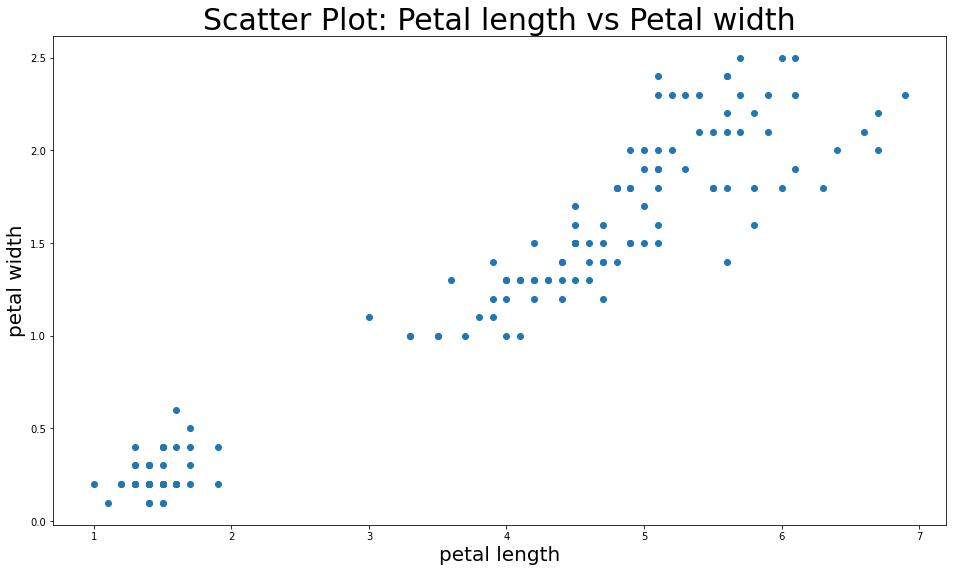

In [103]:
#Plotting df1
plt.figure(figsize=(16,9))
plt.scatter(x = df1['petal length (cm)'], y = df1['petal width (cm)']);
plt.xlabel('petal length', fontsize = 20)
plt.ylabel('petal width',fontsize = 20)
plt.title('Scatter Plot: Petal length vs Petal width', fontsize = 30)
plt.show()

#Finding Optimal Number of Cluster through Elbow Method

In [110]:
#Computing WSS for 10 number of clusters and finding optinmal number of clusters
WSS = []
K = [1,2,3,4,5,6,7,8,9,10]
for k in K:
  km = KMeans(n_clusters=k)
  km.fit(df)
  WSS.append(km.inertia_)
  print('Within Cluster Sum of Square is',km.inertia_,"for Cluster",k)

Within Cluster Sum of Square is 681.3706 for Cluster 1
Within Cluster Sum of Square is 152.34795176035792 for Cluster 2
Within Cluster Sum of Square is 78.85144142614601 for Cluster 3
Within Cluster Sum of Square is 57.25600931571815 for Cluster 4
Within Cluster Sum of Square is 46.44618205128205 for Cluster 5
Within Cluster Sum of Square is 39.066035353535355 for Cluster 6
Within Cluster Sum of Square is 34.299712121212124 for Cluster 7
Within Cluster Sum of Square is 30.137843073593082 for Cluster 8
Within Cluster Sum of Square is 27.9107067669173 for Cluster 9
Within Cluster Sum of Square is 25.938975325937133 for Cluster 10


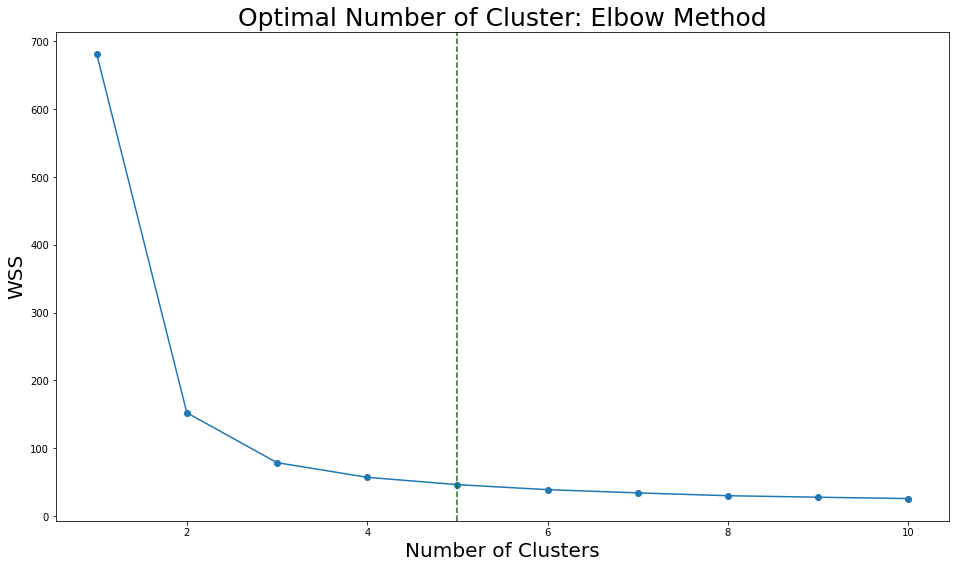

In [113]:
#Ploting Clusters with WSS
plt.figure(figsize = (16,9))
plt.plot(K, WSS, marker = 'o');
plt.axvline(5, c = 'g', linestyle = '--')
plt.xlabel('Number of Clusters', fontsize = 20)
plt.ylabel('WSS', fontsize = 20)
plt.title('Optimal Number of Cluster: Elbow Method', fontsize = 25)
plt.show()

#Finding Optimal Number of Cluster through Silhoutte Method

In [140]:
#Computing Silhoutte Coefficient
sc = []
K = [2,3,4,5,6,7,8,9,10]
for i,k in enumerate(K):
  km = KMeans(n_clusters=k)
  y_predt = km.fit_predict(df1)
  sc.append(silhouette_score(df1, labels=y_predt))
  #print(silhouette_score(df1, labels=y_predt))
  print('Silhoutte Coeffient is ',sc[i].round(4),'for cluster',k)


Silhoutte Coeffient is  0.7654 for cluster 2
Silhoutte Coeffient is  0.6605 for cluster 3
Silhoutte Coeffient is  0.6128 for cluster 4
Silhoutte Coeffient is  0.5884 for cluster 5
Silhoutte Coeffient is  0.5845 for cluster 6
Silhoutte Coeffient is  0.5777 for cluster 7
Silhoutte Coeffient is  0.5872 for cluster 8
Silhoutte Coeffient is  0.5867 for cluster 9
Silhoutte Coeffient is  0.4499 for cluster 10


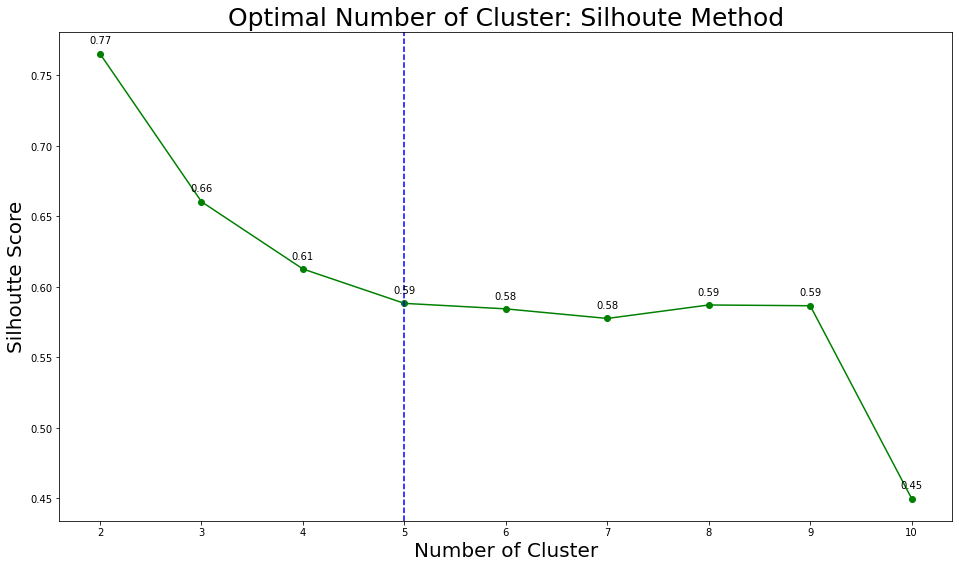

In [147]:
#Ploting Silhoutte Score with K clusters
plt.figure(figsize=(16,9))
plt.plot(K,sc,marker = 'o', c = 'g')
for i,j in zip(K,sc):
  label = "{:.2f}".format(j)
  plt.annotate(label, (i,j), textcoords = "offset points", xytext = (0,10), ha = 'center')
plt.title('Optimal Number of Cluster: Silhoute Method', fontsize = 25)
plt.xlabel('Number of Cluster', fontsize = 20)
plt.ylabel('Silhoutte Score', fontsize = 20)
plt.axvline(5, linestyle = '--', c = 'b')
plt.show()

#Implementing Kmean Clustering with 5 clusters as per Optimal Number of Cluster

In [163]:
#Implementing Kmeans with k = 5

#Calling the function
km = KMeans(n_clusters=5, init= 'k-means++', n_init=10, max_iter=300, tol = 0.0001)
km.fit(df1)
labels = km.predict(df1)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 3, 0, 0, 0, 3, 0, 3, 3, 0, 3, 0, 3, 0,
       0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0,
       3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 2, 4, 2, 4, 4, 2, 0, 2, 4, 2,
       4, 4, 4, 4, 4, 4, 4, 2, 2, 0, 4, 4, 2, 0, 4, 2, 0, 0, 4, 4, 2, 2,
       4, 0, 4, 2, 4, 4, 0, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4], dtype=int32)

In [164]:
df1['Labels'] = labels 
df1

,petal length (cm),petal width (cm),Labels
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
145,5.2,2.3,4
146,5.0,1.9,4
147,5.2,2.0,4
148,5.4,2.3,4


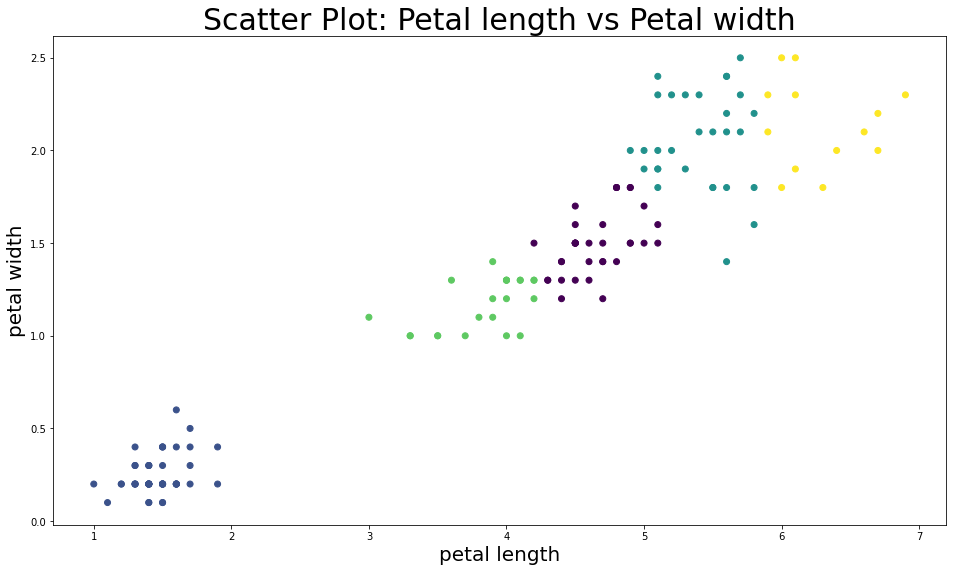

In [159]:
#Visualization of the cluster
plt.figure(figsize=(16,9))
plt.scatter(x = df1['petal length (cm)'], y = df1['petal width (cm)'], c = labels);
plt.xlabel('petal length', fontsize = 20)
plt.ylabel('petal width',fontsize = 20)
plt.title('Scatter Plot: Petal length vs Petal width', fontsize = 30)
plt.show()